In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from Previous_files.data import load_senlis
from Previous_files.plot import show_signal, show_calibration, compare_weights
from Previous_files.bwim import estimation, calibration

In [2]:
%matplotlib notebook

In [3]:
 %matplotlib inline

# Senlis data

In [4]:
trucks = load_senlis(selected=6) #[3,4,6,7]

# Uncomment to print a summary of all data
# pd.DataFrame(trucks)

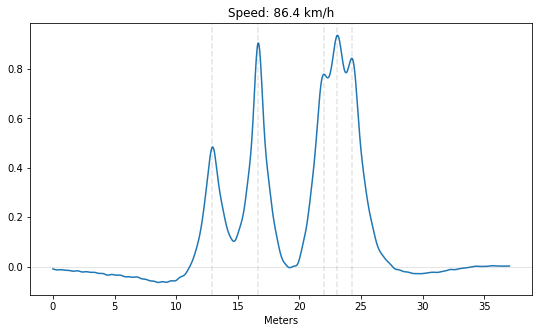

In [5]:
truck = trucks[1]

show_signal(truck)

# Bridge weigh-in-motion

Le modèle BWIM affirme que l'effet induit par le déplacement d'un vehicule sur une structure suspendue peut s'exprimer comme suit:

$$ y(t) = \sum_{a=1}^{A} w_a \, h(t - \tau_a) $$

où 
 - $A$ - nombre d'essieux du vehicule,
 - $w_a$ - poid du vehicule sur l'essieu $a$,
 - $\tau_a$ - instant de passage de l'essieu $a$,
 - $h(t)$ - fonction qui decrit l'effet induit par un chargement unitaire qui se deplace sur le pont à la meme vitesse du vehicule consideré.

## Discrétisation

Soit $f_s = 1/T_s$ la frequence d'echantillonage du systeme, et $t_0$ l'instant d'entrée du vehicule sur le pont.

- Le signal observé est representé par un vecteur de taille $K$:

$$ {\bf y} = \big[y(t_0 + kT_s)\big]_{k\in\{0,\dots,K-1\}}. $$

- La ligne d'influence est representé par un vecteur de taille $M\le K$:

$$ {\bf h} = \big[h(mT_s)\big]_{m\in\{0,\dots,M-1\}}. $$

- L'instant $\tau_a$ est representé par un vecteur de taille $K$ qui prend la valeur $1$ en position $c_a$ (echantillon correspondant au temps $\tau_a$) et $0$ autrement:

$$
\boldsymbol{\delta}_a = \big[\delta_{k,c_a}\big]_{k\in\{0,\dots,K-1\}} = \big[0\;\dots\;0\;\underbrace{1}_{c_a}\;0\;\dots\;0\big]^\top.
$$

Le modèle BWIM peut alors se traduire par la rélation suivante:

$$ {\bf y} = \sum_{a=1}^A w_a \, \boldsymbol{\delta}_{a} * {\bf h}, $$

où le symbole $*$ denote le produit de convolution. De plus, on remarque que la convolution par le vecteur de decalage $\boldsymbol{\delta}_{a}$ est equivalent au produit par une matrice de Toeplitz $\mathbf{D_a} \in \mathbb{R}^{K\times M}$. Le modèle BWIM se reconduit alors au systeme lineaire

$$ {\bf y} = \sum_{a=1}^A w_a \mathbf{D_a} {\bf h}. $$

## Calibration

La calibration consiste à retrouver la ligne d'influence ${\bf h}$ à partir du signal observé ${\bf y}$, des instants de passage $\tau_{1},\dots,\tau_{A}$, et des poids $w_1,\dots,w_a$ connus à l'avance. Pour ce faire, on récrit le modèle BWIM sous forme d'un systeme lineaire qui depend de ${\bf h}$, c'est à dire

$$ {\bf y} = {\bf T}{\bf h} \qquad\textrm{with}\quad {\bf T} = \sum_{a=1}^A w_a \mathbf{D_a}. $$

Si ${\bf T}$ est une matrice de rang plein (ce qui est possible car $M\le K$), on peut retrouver la ligne d'influence par la méthode des moindres carrés, qui consiste à

$$ \operatorname*{minimize}_{{\bf h} \in \mathbb{R}^M} \; \| {\bf T}{\bf h} - {\bf y} \|^2, $$

dont la solution est $ {\bf h}^* = ({\bf T}^\top{\bf T})^{-1} {\bf T}^\top{\bf y}$.

<Figure size 648x360 with 0 Axes>

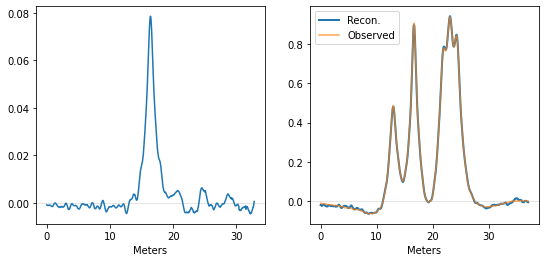

In [8]:
plt.figure(figsize=(9,5))
influence = calibration(truck, length=701)
show_calibration(truck, influence)

## Pesée en marche

La pesée en marche consiste à retrouver les poids $w_1,\dots,w_a$ à partir du signal observé ${\bf y}$, des instants de passage $\tau_{1},\dots,\tau_{A}$, et de la ligne d'influence ${\bf h}$ connue à l'avance. Pour ce faire, on récrit le modèle BWIM sous forme d'un systeme lineaire qui depend de ${\bf w} = [w_1,\dots,w_a]^\top$, c'est à dire

$$ {\bf y} = {\bf H}{\bf w} \qquad\textrm{with}\quad {\bf H} = \begin{bmatrix} \mathbf{D_1} {\bf h} & \mathbf{D_2} {\bf h} &\dots& \mathbf{D_A} {\bf h} \end{bmatrix}. $$

Si ${\bf H}$ est une matrice de rang plein, on peut retrouver les poids par la méthode des moindres carrés, qui consiste à

$$ \operatorname*{minimize}_{{\bf w} \in \mathbb{R}^A} \; \| {\bf H}{\bf w} - {\bf y} \|^2, $$

dont la solution est ${\bf w}^* = ({\bf H}^\top{\bf H})^{-1} {\bf H}^\top{\bf y}$.

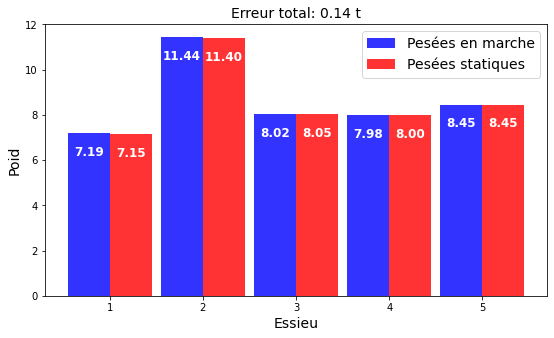

In [11]:
w = estimation(truck, influence)

compare_weights(w, truck.weights)

# Validation croisée

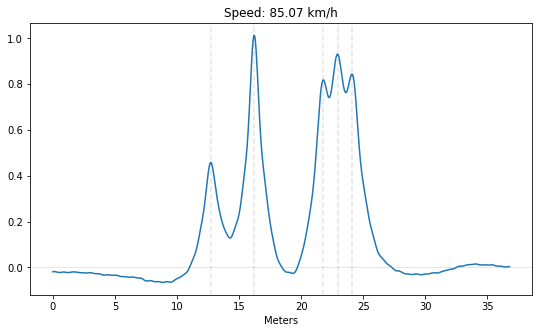

In [12]:
another_truck = trucks[0]

show_signal(another_truck)

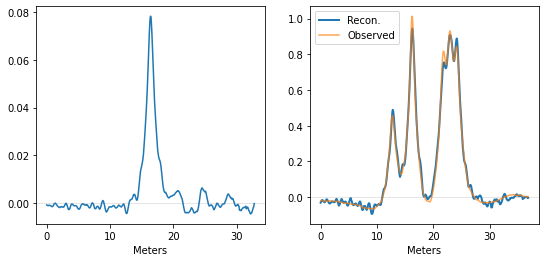

In [13]:
show_calibration(another_truck, influence)

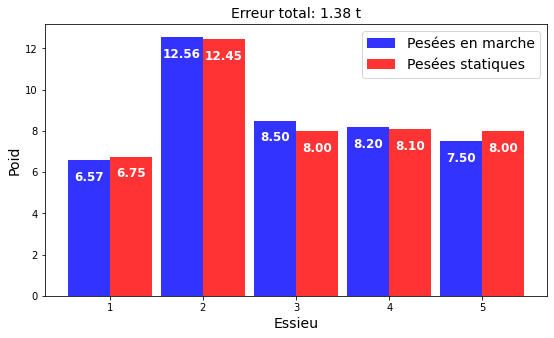

In [14]:
w = estimation(another_truck, influence)

compare_weights(w, another_truck.weights)

#### TODO

- Calculer la ligne d'influence à partir des données de calibration
- Calculer le poid total (cf. mail Franziska) 
- Ajouter la contrante au probleme inverse.
